# HBV analysis

In [1]:
using Vann
using PyPlot

## Load data

In [2]:
date, tair, prec, q_obs, frac = load_data("//hdata/fou/jmg/FloodForecasting/Data/2_11_data");

date, tair, prec, q_obs = crop_data(date, tair, prec, q_obs, Date(1995,10,1), Date(2015,9,30));

## Initilize model

In [3]:
# Initilize model

st_snow = TinBasic(frac);
st_hydro = Hbv();

## Functions for running models

In [4]:
function run_local(st_snow, st_hydro, date, tair, prec)

    # Number of time steps

    ntimes = size(prec, 2);

    # Run model

    q_sim = zeros(Float64, ntimes);
    swe   = zeros(Float64, ntimes);
    sm    = zeros(Float64, ntimes);
    suz   = zeros(Float64, ntimes);
    slz   = zeros(Float64, ntimes);
    uh    = zeros(Float64, ntimes);    

    for itime in 1:ntimes
        
        # Snow model part

        get_input(st_snow, prec, tair, date, itime);

        snow_model(st_snow);
        
        # Soil model part

        get_input(st_snow, st_hydro);

        q_sim[itime] = hydro_model(st_hydro);
        
        # Write outputs
        
        swe[itime] = sum(st_snow.swe .* st_snow.frac);
        
        sm[itime] = st_hydro.sm;
        
        suz[itime] = st_hydro.suz;
        
        slz[itime] = st_hydro.slz;
        
        uh[itime] = sum(st_hydro.st_uh);
        

    end

    return(q_sim, swe, sm, suz, slz, uh)

end

run_local (generic function with 1 method)

## Assign parameter values

In [5]:
assign_param(st_snow, [0.679873,2.03531,0.977917])
assign_param(st_hydro, [32.2138,0.503571,0.16966,0.0458342,0.125857,1.0,983.458,44.2194,1.52702])

println(st_snow.param)
println(st_hydro.param)

println(st_hydro.hbv_ord)

[0.679873,2.03531,0.977917]
[32.2138,0.503571,0.16966,0.0458342,0.125857,1.0,983.458,44.2194,1.52702]
[0.761771,0.238229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]


## Run model

In [6]:
q_sim, swe, sm, suz, slz, uh = run_local(st_snow, st_hydro, date, tair, prec);

## Plot results

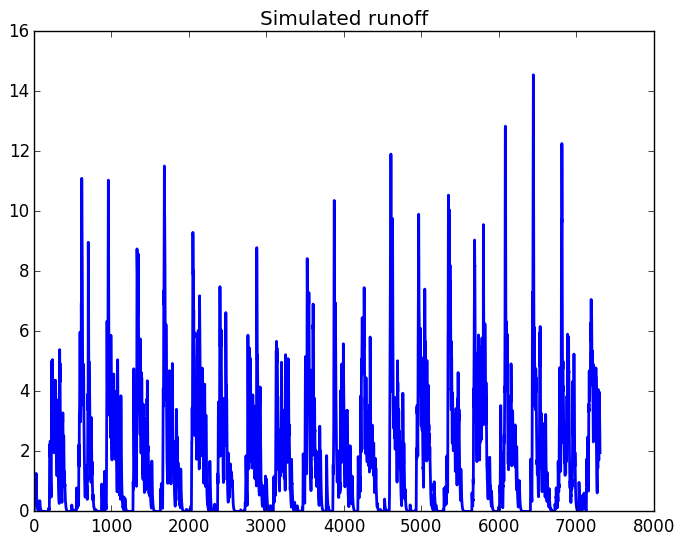

In [7]:
plot(1:length(q_sim), q_sim, linewidth=2.0);
title("Simulated runoff");

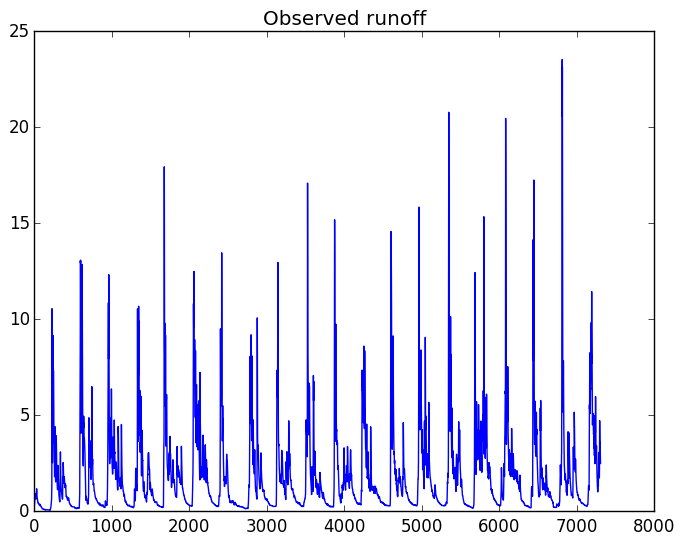

In [8]:
plot(1:length(q_obs), q_obs, linewidth=1.0);
title("Observed runoff");

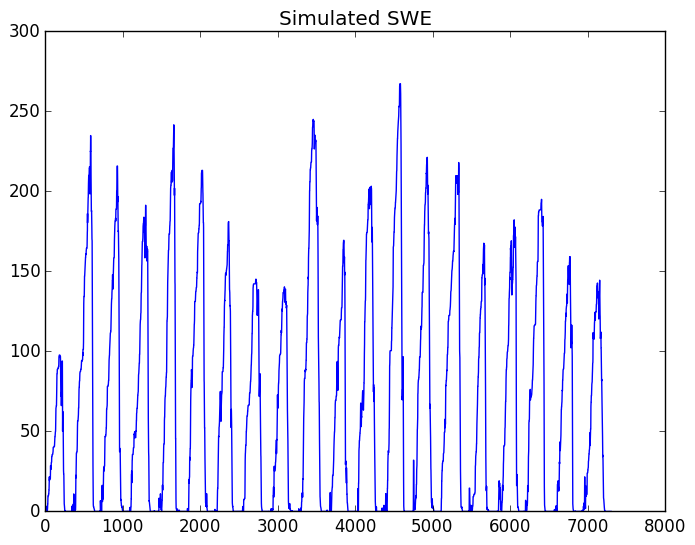

In [9]:
plot(1:length(swe), swe);
title("Simulated SWE");

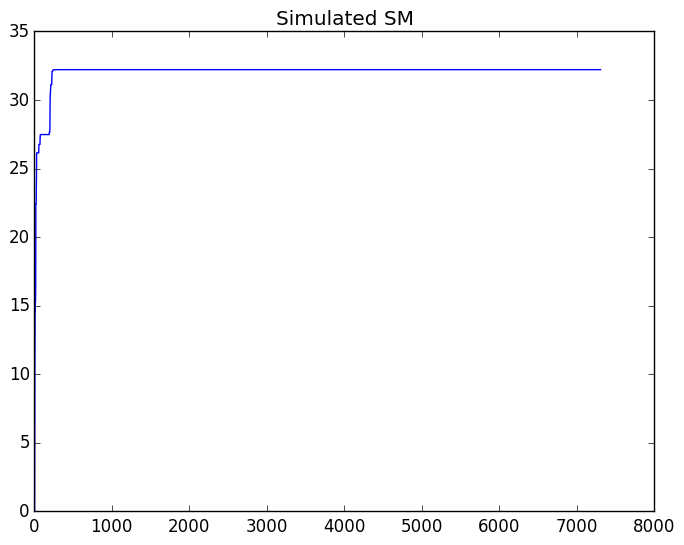

In [10]:
plot(1:length(sm), sm);
title("Simulated SM");

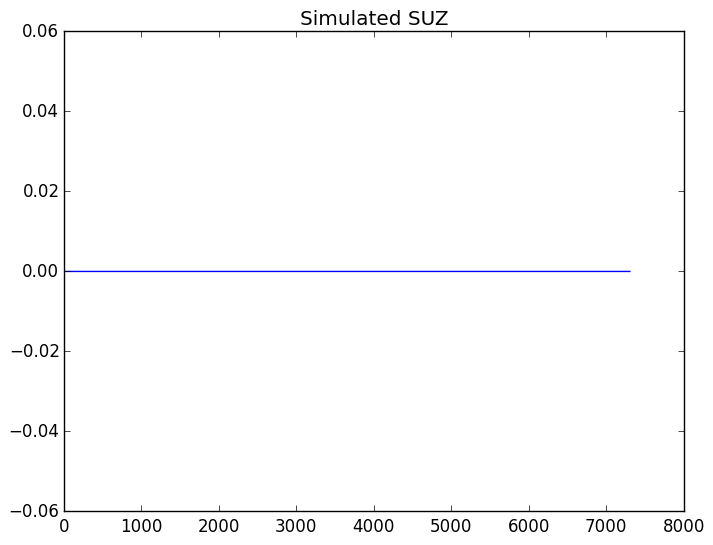

In [11]:
plot(1:length(suz), suz);
title("Simulated SUZ");

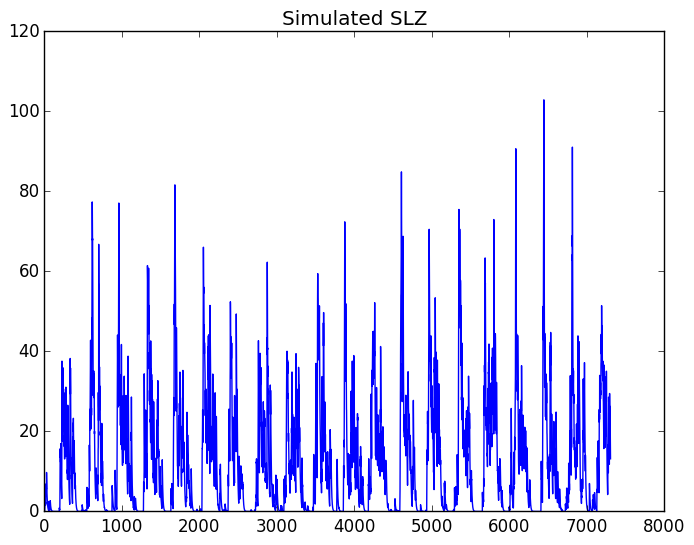

In [12]:
plot(1:length(slz), slz);
title("Simulated SLZ");

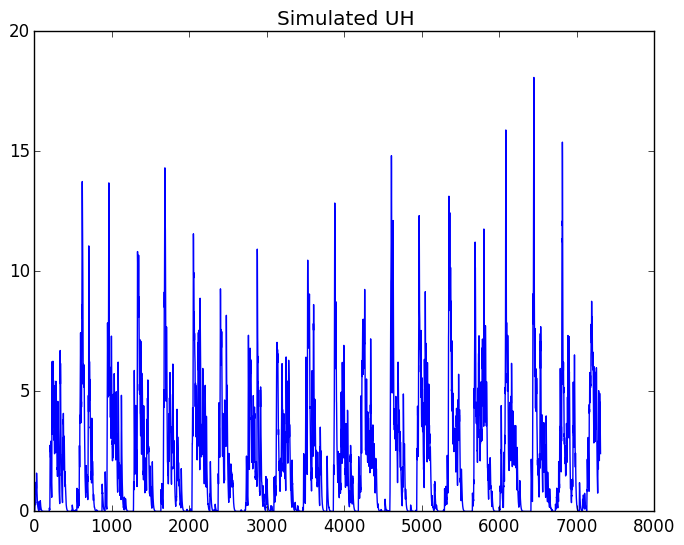

In [13]:
plot(1:length(uh), uh);
title("Simulated UH");